In [2]:


import pandas as pd
import numpy as np
from functools import reduce
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import re
from sklearn.svm import SVC
from sklearn.metrics import f1_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import Lasso, Ridge

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import stop_words

In [4]:
path = '/Users/kimia/Desktop/Capstone/hotel/Rec_system/Rec_system/DFs/'
DF_all_vectorized_w_metadata = pd.read_csv(path+'DF_all_vectorized_w_metadata.csv')
df = DF_all_vectorized_w_metadata

In [5]:
# Clean the Data
df['followers'] = df['followers'].apply(lambda x: x.replace(",", ""))
df['followers'] = df['followers'].apply(lambda x: x.replace('k',"000").replace(".","").replace("m","000000").replace(",",""))
df['followers'] = df['followers'].apply(lambda x: pd.to_numeric(x))

def zscore(x,mu,std):
    zscore = (x-mu)/std
    return(zscore)

def metrics(df): 
    df[['likes','followers']] = df[['likes','followers']].apply(pd.to_numeric)
  

    df['likes_score'] = (df['likes'])/(df['followers'])
    
    df['comments_score'] = (df['comments'])/(df['followers'])
    
    df['zscore_likes'] = zscore(df['likes_score'], df.likes_score.std(), df.likes_score.mean())
    
    df['zscore_comments'] = zscore(df['comments_score'], df.comments_score.std(), df.comments_score.mean())
    
    #df['final_score'] = df['zscore_likes'] + df['zscore_comments']
    df['numerical_score'] = df['likes_score'] #+ df['comments_score']
    
    
    
    ###### need to edit this
    df['final_score'] = (df['numerical_score'])

In [6]:
metrics(df)

# WP Having trouble Modularizing this! HALP

In [7]:
for i, v in enumerate(df['final_score']):
    if df['final_score'][i] > df['numerical_score'].median():
        df['final_score'][i] = 1
    if df['final_score'][i] < df['numerical_score'].median():
        df['final_score'][i] = 0

/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 124.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  124.]),
 array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.2

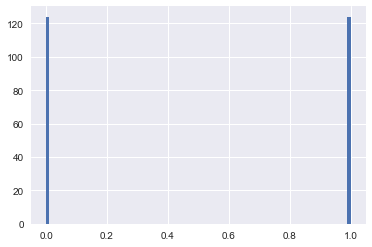

In [8]:
plt.hist(df['final_score'], bins = 100)

In [9]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score


def svm_model(): 
    
    y = df.final_score

    predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
       'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
    X = df[predictors]


    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=9)




    #Log Regression using LRCV
    #cross validation values
    cvals = [1, 10, 100, 10000, 100000]
    logit  = SVC()
    logit.fit(X_train, y_train)
    y_hat_train = logit.predict(X_train)
    y_hat_test = logit.predict(X_test)
    #####


    trainscore = (f1_score(y_train, y_hat_train, average='binary'))
    testscore = (f1_score(y_test, y_hat_test, average='binary'))
    return('Train, Test: ', trainscore, testscore)

In [10]:
svm_model()

('Train, Test: ', 0.67032967032967028, 0.65934065934065944)

## NOICE 66%!!! 

In [15]:
from sklearn.externals import joblib
joblib.dump(logit, 'SVM_logit.pkl')

#joblib.dump(model_kmeans_users, 'model_kmeans.pkl')

['SVM_logit.pkl']

In [16]:
del logit

In [17]:
model_kmeans_users = joblib.load('SVM_logit.pkl')

In [13]:
y = df.final_score

predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
   'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
X = df[predictors]


scaler = MinMaxScaler()
X = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=9)




#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit  = SVC()
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)
#####


trainscore = (f1_score(y_train, y_hat_train, average='binary'))
testscore = (f1_score(y_test, y_hat_test, average='binary'))
